In [1]:
import numpy as np
import glob
from os.path import dirname, join as pjoin
import scipy.io as sio
import pdb
import matplotlib.pyplot as plt

In [2]:
plt.rcParams.update({'figure.max_open_warning': 0})

In [3]:
N_dataset = 21
N_cell = 189
T = 960
N_length = 109
odor_channels = 3
T_start = 160
trace_datasets = np.zeros((N_dataset, N_cell, T))
odor_datasets = np.zeros((N_dataset, odor_channels, T))
name_list = []
        
# .mat data load
basepath = ''
mat_fname = pjoin(basepath, 'all_traces_Heads_new.mat')
trace_variable = sio.loadmat(mat_fname)
#trace_arr = trace_variable['norm_traces']
trace_arr = trace_variable['traces']
is_L = trace_variable['is_L']
neurons_name = trace_variable['neurons']
stim_names = trace_variable["stim_names"]
stimulate_seconds = trace_variable['stim_times']
stims = trace_variable['stims']
# multiple trace datasets concatnate
for idata in range(N_dataset):
    ineuron = 0
    for ifile in range(N_length):
        if trace_arr[ifile][0].shape[1] == 42:
            data = trace_arr[ifile][0][0][idata]
            if data.shape[0] < 1:
                trace_datasets[idata][ineuron][:] = np.nan
            else:
                trace_datasets[idata][ineuron][0:data[0].shape[0]] = data[0]
            ineuron+= 1
            data = trace_arr[ifile][0][0][idata + 21]
            if data.shape[0] < 1:
                trace_datasets[idata][ineuron][:] = np.nan
            else:
                trace_datasets[idata][ineuron][0:data[0].shape[0]] = data[0]
            ineuron+= 1
        else:
            data = trace_arr[ifile][0][0][idata]
            if data.shape[0] < 1:
                trace_datasets[idata][ineuron][:] = np.nan
            else:
                trace_datasets[idata][ineuron][0:data[0].shape[0]] = data[0]
            ineuron+= 1
# neural activity target
activity_worms = trace_datasets[:,:, T_start:] + 2
name_list = []
for ifile in range(N_length):
    if is_L[ifile][0][0].shape[0] == 42:
        name_list.append(neurons_name[ifile][0][0] + 'L')
        name_list.append(neurons_name[ifile][0][0] + 'R')
    else:
        name_list.append(neurons_name[ifile][0][0])
activity_list = name_list

step = 0.25
time = np.arange(start = 0, stop = T * step , step = step)
# odor list
odor_list = ['butanone','pentanedione','NaCL']
# multiple odor datasets concatnate
for idata in range(N_dataset):
    for it_stimu in range(stimulate_seconds.shape[0]):
        tim1_ind = time>stimulate_seconds[it_stimu][0]
        tim2_ind = time<stimulate_seconds[it_stimu][1]
        odor_on = np.multiply(tim1_ind.astype(np.int),tim2_ind.astype(np.int))
        stim_odor = stims[idata][it_stimu] - 1
        odor_datasets[idata][stim_odor][:] = odor_on
                
odor_worms = odor_datasets[:,:, T_start:]

In [4]:
odor_worms.shape

(21, 3, 800)

In [5]:
activity_worms.shape

(21, 189, 800)

In [6]:
activity_list

['ADAL',
 'ADAR',
 'ADEL',
 'ADER',
 'ADFL',
 'ADFR',
 'ADLL',
 'ADLR',
 'AFDL',
 'AFDR',
 'AIAL',
 'AIAR',
 'AIBL',
 'AIBR',
 'AIML',
 'AIMR',
 'AINL',
 'AINR',
 'AIYL',
 'AIYR',
 'AIZL',
 'AIZR',
 'ALA',
 'AQR',
 'AS01',
 'ASEL',
 'ASER',
 'ASGL',
 'ASGR',
 'ASHL',
 'ASHR',
 'ASIL',
 'ASIR',
 'ASJL',
 'ASJR',
 'ASKL',
 'ASKR',
 'AUAL',
 'AUAR',
 'AVAL',
 'AVAR',
 'AVBL',
 'AVBR',
 'AVDL',
 'AVDR',
 'AVEL',
 'AVER',
 'AVFL',
 'AVFR',
 'AVG',
 'AVHL',
 'AVHR',
 'AVJL',
 'AVJR',
 'AVKL',
 'AVKR',
 'AVL',
 'AWAL',
 'AWAR',
 'AWBL',
 'AWBR',
 'AWCL',
 'AWCR',
 'BAGL',
 'BAGR',
 'CEPDL',
 'CEPDR',
 'CEPVL',
 'CEPVR',
 'DA01',
 'DB01',
 'DB02',
 'DD01',
 'FLPL',
 'FLPR',
 'I1L',
 'I1R',
 'I2L',
 'I2R',
 'I3',
 'I4',
 'I5',
 'I6',
 'IL1L',
 'IL1R',
 'IL1DL',
 'IL1DR',
 'IL1VL',
 'IL1VR',
 'IL2L',
 'IL2R',
 'IL2DL',
 'IL2DR',
 'IL2VL',
 'IL2VR',
 'M1',
 'M2L',
 'M2R',
 'M3L',
 'M3R',
 'M4',
 'M5',
 'MCL',
 'MCR',
 'MI',
 'NSML',
 'NSMR',
 'OLLL',
 'OLLR',
 'OLQDL',
 'OLQDR',
 'OLQVL',
 'OLQVR

In [7]:
t_steps = activity_worms.shape[2]
time = np.arange(0,t_steps)/2.5

In [8]:
plot_dict = {'AWCL':0,'AIBL':1,'AVAL':2,'RIML':3}

In [9]:
data_index=0
time_step = time[1]-time[0]
odor_0_0 = np.where(odor_worms[data_index,0,:]==1)[0][0] * time_step
odor_0_1 = (np.where(odor_worms[data_index,0,:]==1)[0][-1]+1) * time_step
odor_1_0 = np.where(odor_worms[data_index,1,:]==1)[0][0] * time_step
odor_1_1 = (np.where(odor_worms[data_index,1,:]==1)[0][-1]+1) * time_step
odor_2_0 = np.where(odor_worms[data_index,2,:]==1)[0][0] * time_step
odor_2_1 = (np.where(odor_worms[data_index,2,:]==1)[0][-1]+1) * time_step

Text(0.08, 0.5, '${\\Delta F / F}$')

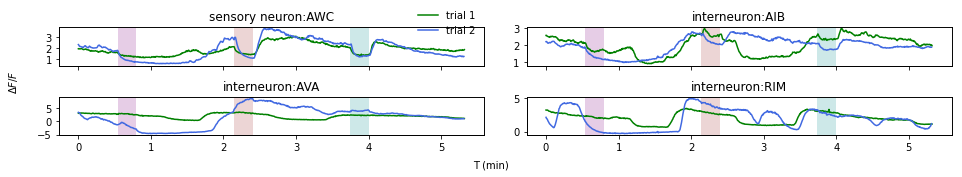

In [10]:
#animal 1, 2
data_index = 0
color_list = ['green','royalblue']
num_neuron = activity_worms.shape[1]
fig, axs = plt.subplots(2,2, figsize=(16,2))
for neuron_index in range(num_neuron):
    neuron_name = activity_list[neuron_index]
    if neuron_name in plot_dict:
        ineuron = plot_dict[neuron_name]
        ix = int(ineuron/2)
        iy = int(ineuron%2)
        for data_index in range(2):
            axs[ix][iy].plot(time*1/60,activity_worms[data_index,neuron_index,:],label='trial %d'%(data_index+1),color=color_list[data_index])
            if ineuron ==0:
                axs[ix][iy].set_title('sensory neuron:'+ neuron_name.replace('L',''))
            else:
                axs[ix][iy].set_title('interneuron:'+ neuron_name.replace('L',''))
            axs[ix][iy].spines['right'].set_visible(False)
            axs[ix][iy].spines['top'].set_visible(False)
            
            time_st = 60
            alpha = 0.1
            axs[ix][iy].axvspan(odor_0_0/time_st, odor_0_1/time_st, color='brown', alpha=alpha, lw=0)
            axs[ix][iy].axvspan(odor_1_0/time_st, odor_1_1/time_st, color='purple', alpha=alpha, lw=0)
            axs[ix][iy].axvspan(odor_2_0/time_st, odor_2_1/time_st, color='darkcyan', alpha=alpha, lw=0)
            ax2 = axs[ix][iy].twinx()
            ax2.set(yticklabels=[])
            ax2.yaxis.set_ticks([])

axs[0][0].set(xticklabels=[])
axs[0][1].set(xticklabels=[])

axs[0][0].legend(loc='upper right',bbox_to_anchor=(1, 1.65),framealpha=0)
plt.subplots_adjust(hspace = 0.8)
plt.subplots_adjust(wspace = 0.1)
fig.text(0.5, -0.1, 'T (min)', ha='center')
fig.text(0.08, 0.5, r'${\Delta F / F}$', va='center', rotation='vertical')

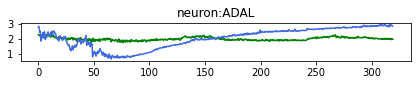

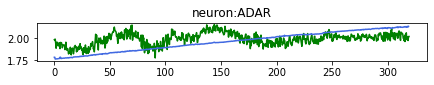

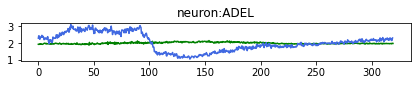

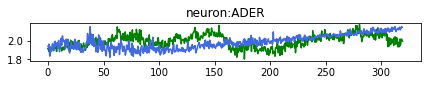

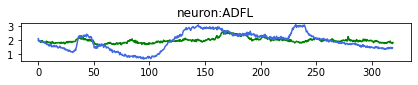

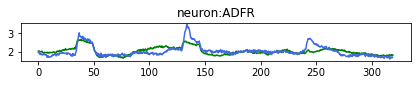

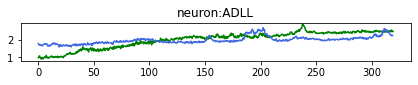

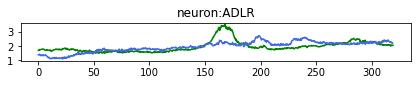

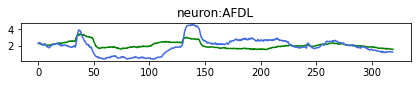

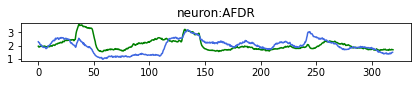

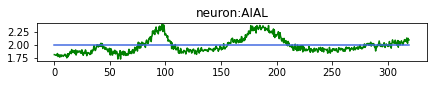

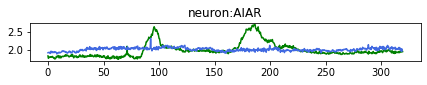

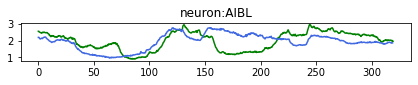

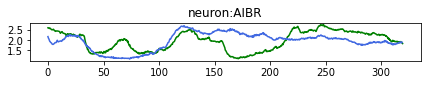

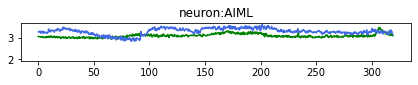

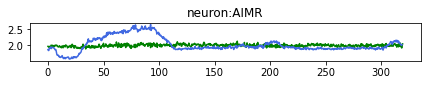

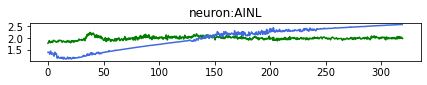

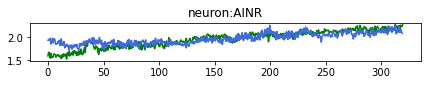

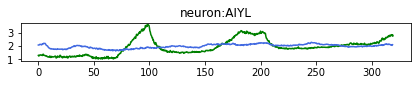

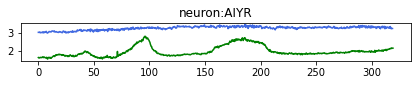

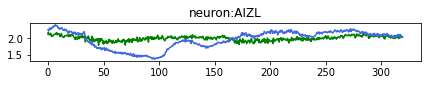

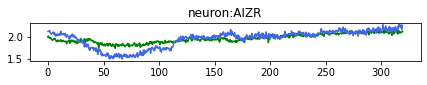

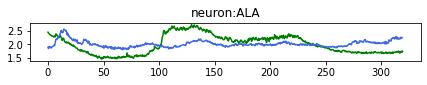

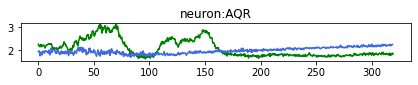

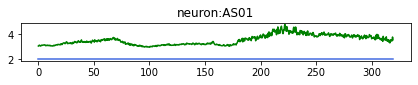

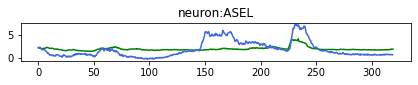

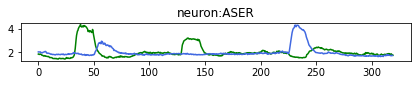

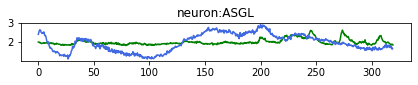

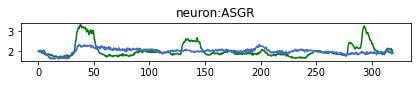

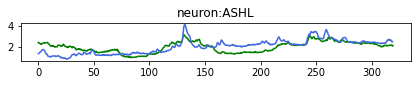

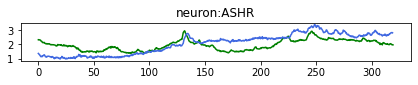

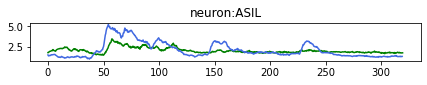

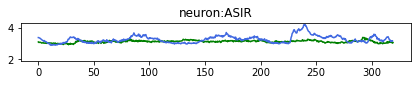

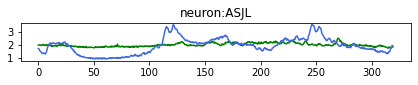

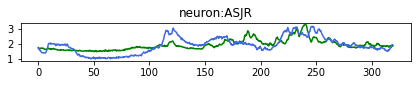

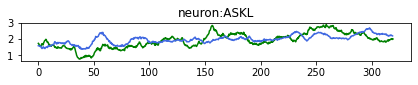

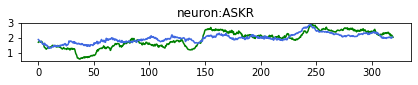

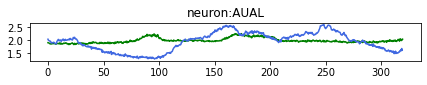

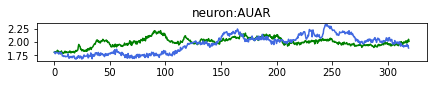

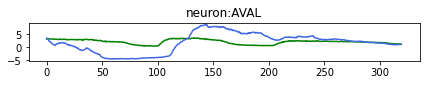

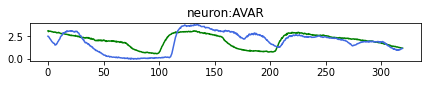

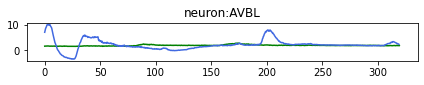

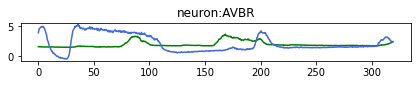

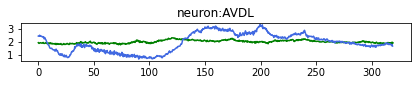

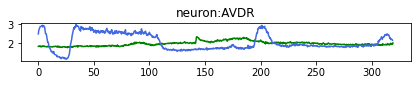

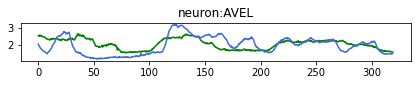

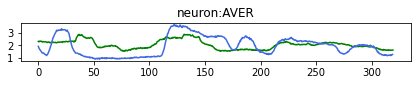

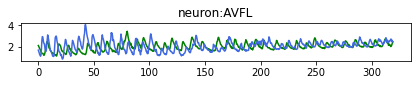

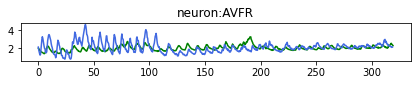

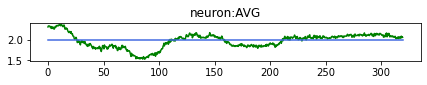

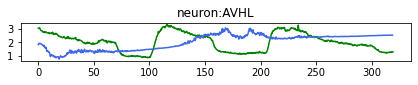

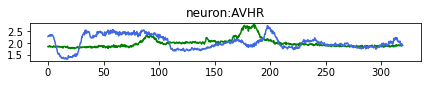

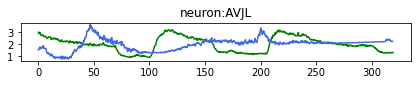

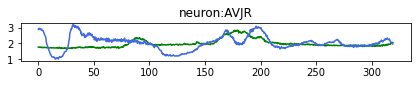

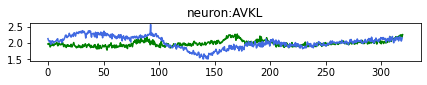

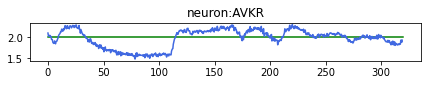

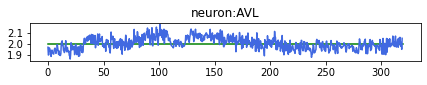

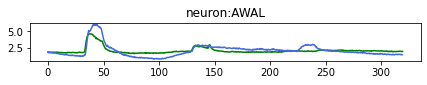

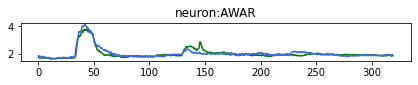

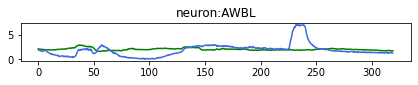

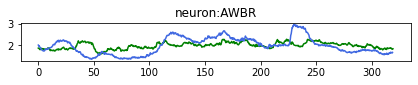

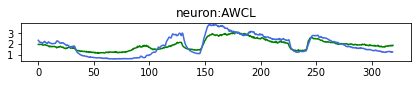

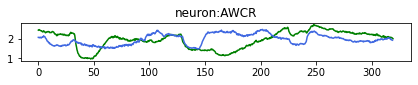

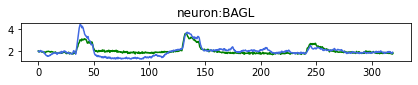

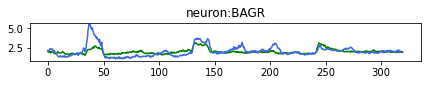

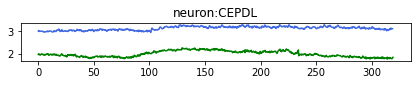

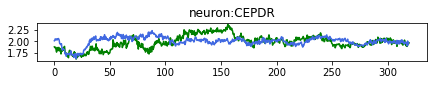

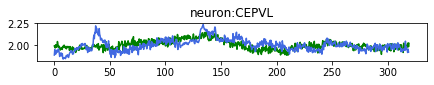

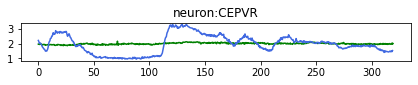

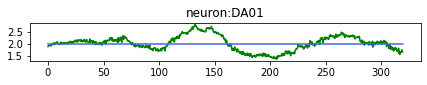

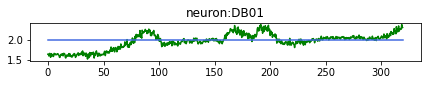

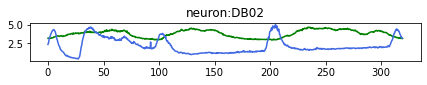

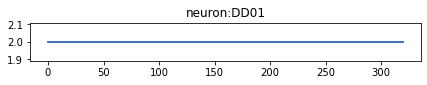

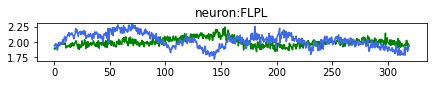

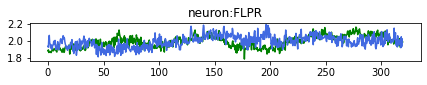

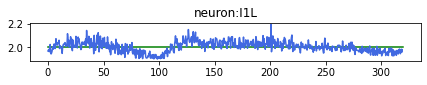

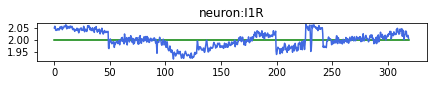

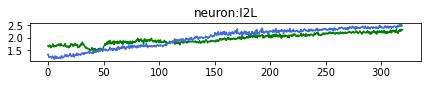

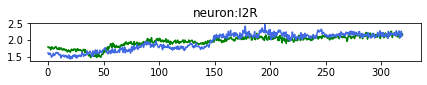

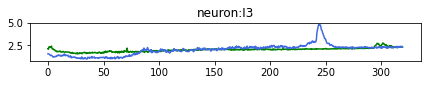

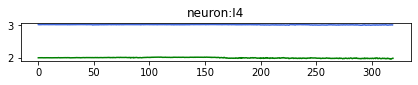

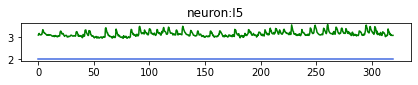

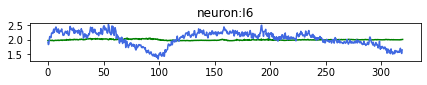

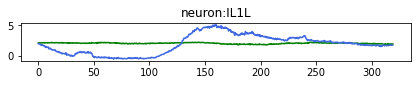

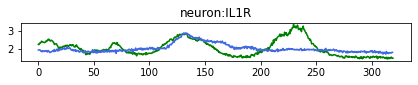

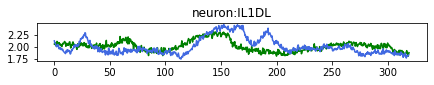

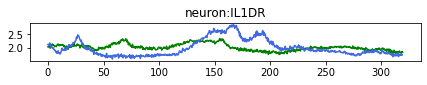

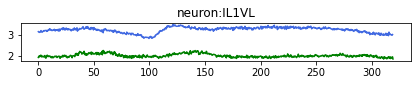

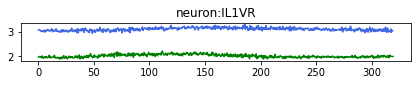

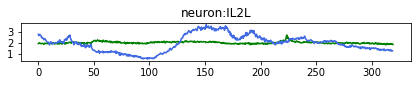

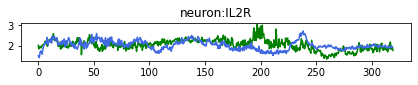

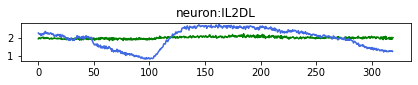

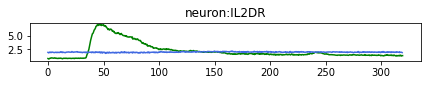

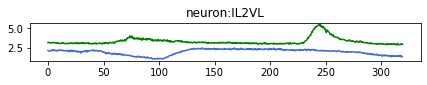

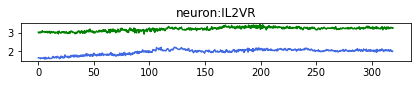

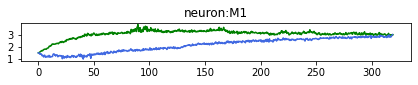

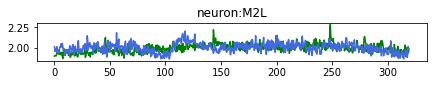

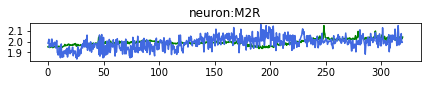

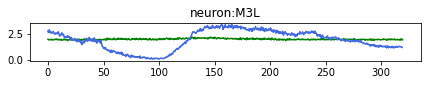

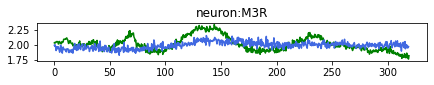

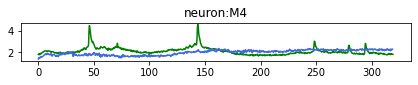

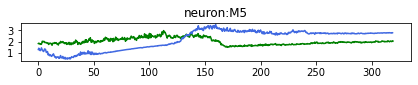

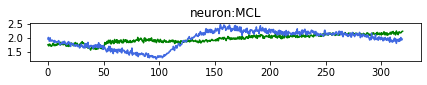

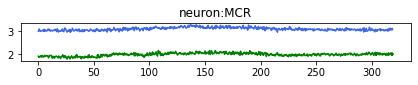

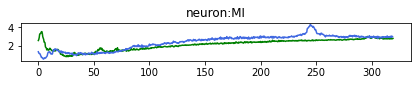

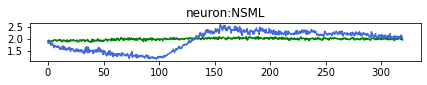

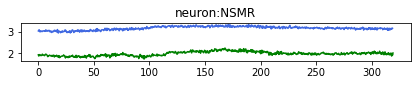

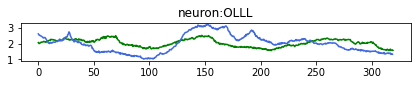

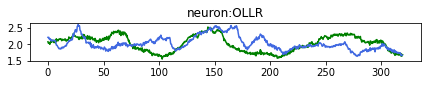

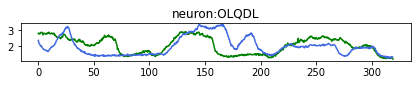

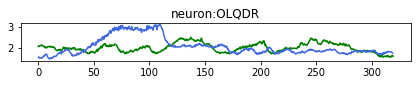

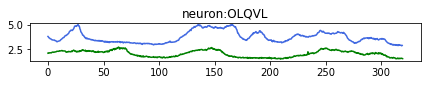

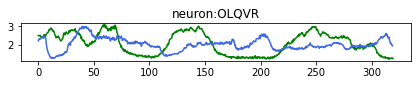

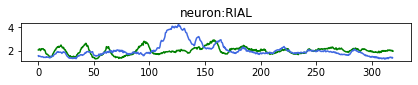

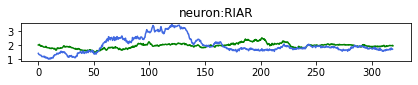

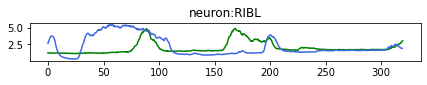

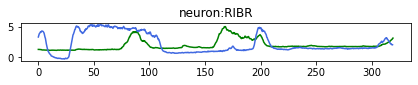

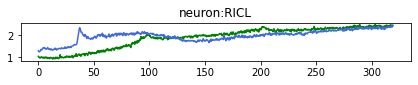

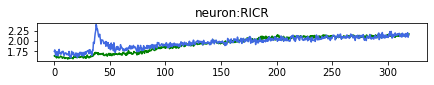

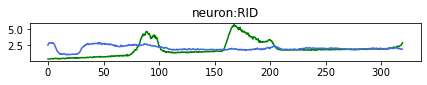

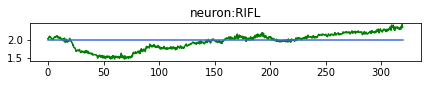

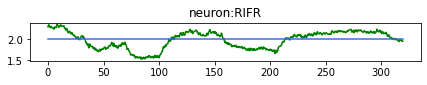

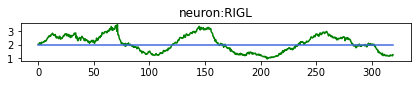

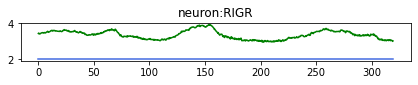

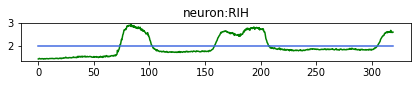

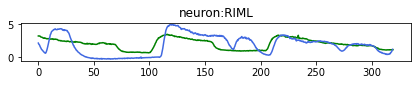

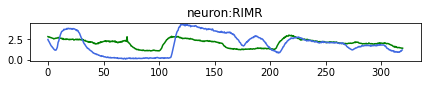

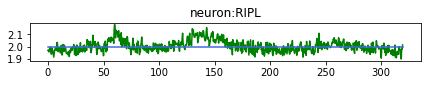

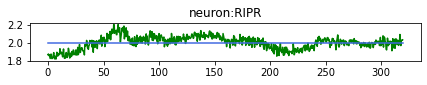

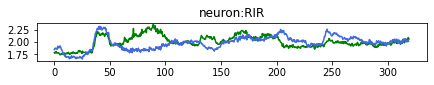

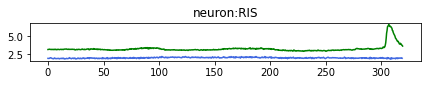

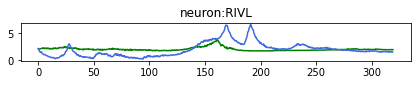

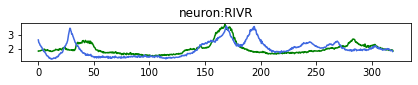

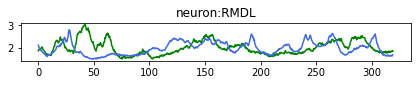

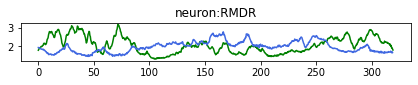

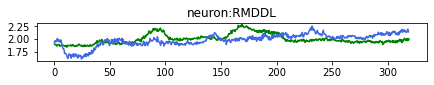

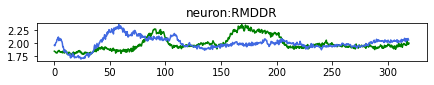

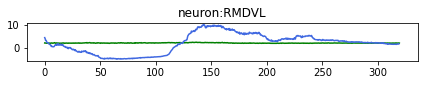

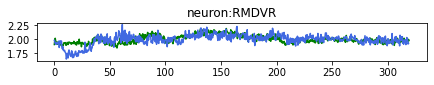

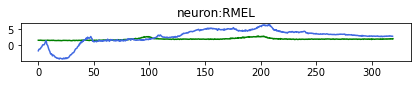

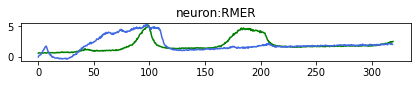

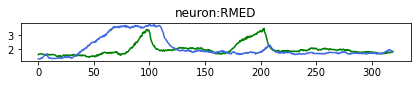

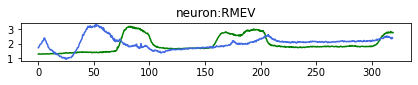

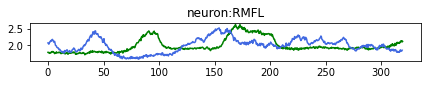

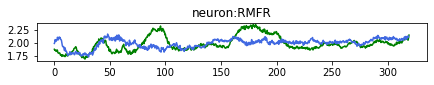

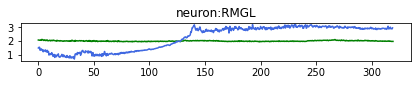

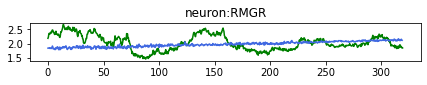

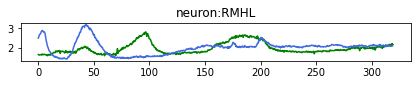

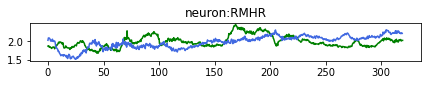

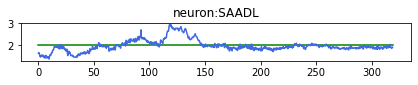

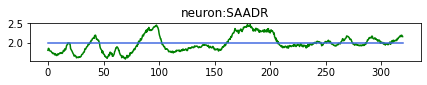

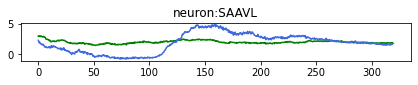

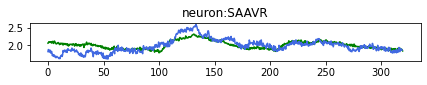

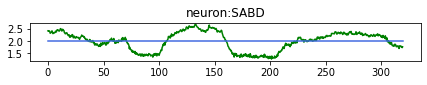

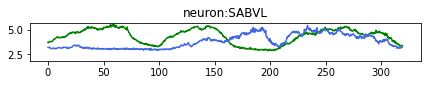

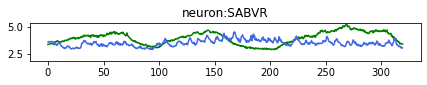

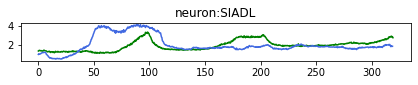

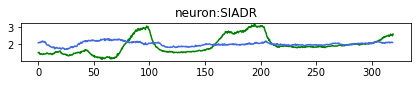

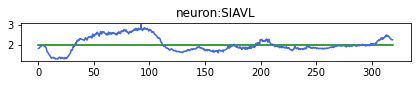

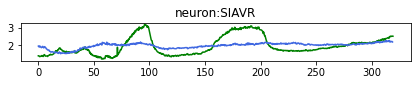

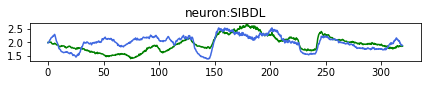

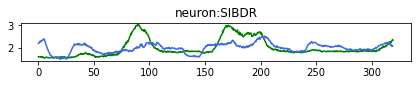

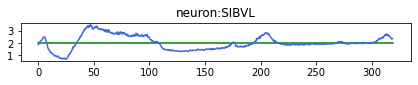

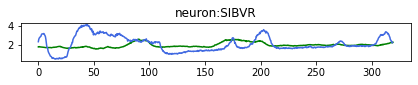

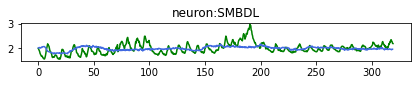

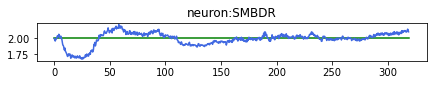

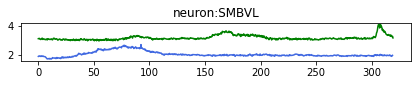

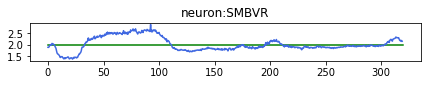

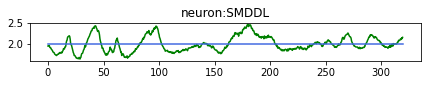

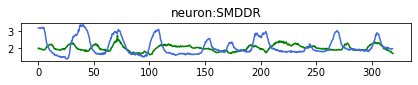

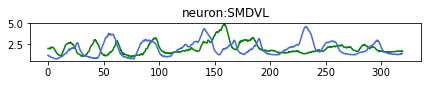

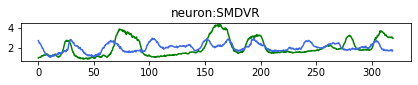

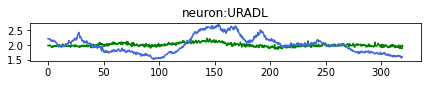

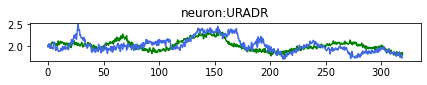

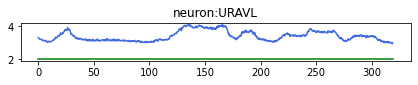

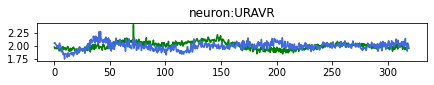

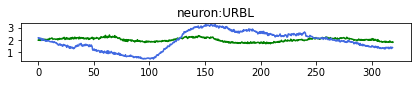

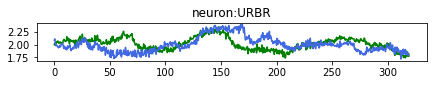

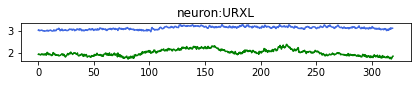

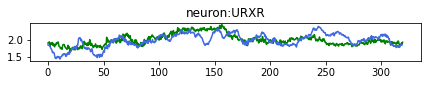

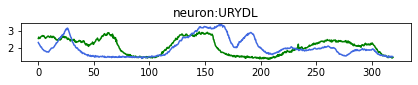

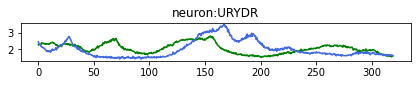

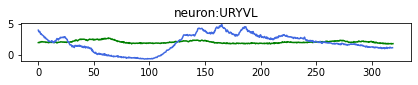

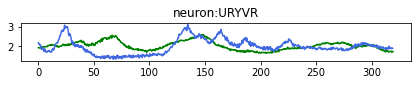

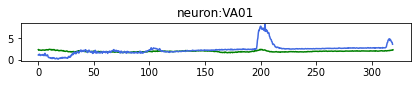

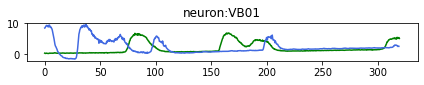

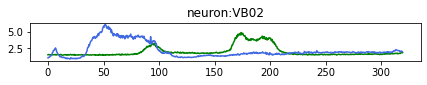

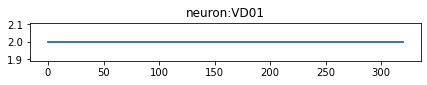

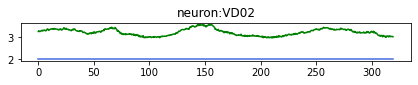

In [11]:
#animal 1, 2
data_index = 0
color_list = ['green','royalblue']
num_neuron = activity_worms.shape[1]
for neuron_index in range(num_neuron):
    fig, ax1 = plt.subplots(figsize=(7,0.7))
    for data_index in range(2):
        ax1.plot(time,activity_worms[data_index,neuron_index,:],label='trial_%d'%(data_index+1),color=color_list[data_index])
        neuron_name = activity_list[neuron_index]
        ax1.set_title('neuron:'+ neuron_name)